tensorflow는 코딩 규칙이 거의 비슷하여서 이론만 알고 있으면 쉬움

기본 이미지 분류

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import seaborn as sns

In [3]:
iris = sns.load_dataset('iris')

In [4]:
iris.species=iris.species.map({'setosa':0, 'versicolor':1, 'virginica':2})

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()

checklist
1. input_shape : 1차원으로 바꿔야함
2. output layer : classification 인 경우 class 갯수 만큼
     - 활성화 함수 :softmax 

In [6]:
model=tf.keras.models.Sequential()

In [7]:
model.add(tf.keras.layers.Dense(16, input_shape=(4,), activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

In [8]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, 
              optimizer=tf.keras.optimizers.Adam())

#function, class 이므로 인스턴츠화

In [10]:
model.fit(iris.iloc[:,:-1],iris.species,  epochs=5) 

AttributeError: iloc

- **pandas는 tensorflow 2.0 에서도 연동되어 사용가능** (예. pandas DataFrame)
- tensorflow 와 연동됨
- input 데이터 모양만 잘 맞추면 어떠한 수치형 데이터를 가져다가 쓸 수 있음

In [11]:
from sklearn.datasets import load_boston

In [12]:
data= load_boston()

In [13]:
import pandas as pd
boston =pd.DataFrame(data.data ,columns= data.feature_names)
boston['target']=data.target

In [14]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
train,test= train_test_split(boston.iloc[:,:-1])

In [17]:
train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
358,5.20177,0.0,18.10,1.0,0.770,6.127,83.4,2.7227,24.0,666.0,20.2,395.43,11.48
421,7.02259,0.0,18.10,0.0,0.718,6.006,95.3,1.8746,24.0,666.0,20.2,319.98,15.70
477,15.02340,0.0,18.10,0.0,0.614,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
380,88.97620,0.0,18.10,0.0,0.671,6.968,91.9,1.4165,24.0,666.0,20.2,396.90,17.21
436,14.42080,0.0,18.10,0.0,0.740,6.461,93.3,2.0026,24.0,666.0,20.2,27.49,18.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,0.04379,80.0,3.37,0.0,0.398,5.787,31.1,6.6115,4.0,337.0,16.1,396.90,10.24
363,4.22239,0.0,18.10,1.0,0.770,5.803,89.0,1.9047,24.0,666.0,20.2,353.04,14.64
37,0.08014,0.0,5.96,0.0,0.499,5.850,41.5,3.9342,5.0,279.0,19.2,396.90,8.77
229,0.44178,0.0,6.20,0.0,0.504,6.552,21.4,3.3751,8.0,307.0,17.4,380.34,3.76


### Regression
- 모양 : output layer 가 상이
    - output layer 의 노드가 1개 
- loss function : MSE

In [18]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(4,input_shape=(13,),activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1)
])

In [19]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### loss
회귀문제에서의 loss function : MSE(Mean Squared Error)
- `mse`: 실제값과 예측값 간의 차이를 제곱하여 합한 값
    - 크기가 작을 수록 좋음(예측이 실제값과 가깝다는 의미)

- EPOCH 진행 수 ,  데이터 506/506

In [20]:
model.compile(loss='mse', 
              optimizer=tf.keras.optimizers.Adam())

기본 옵션이 운영체제마다 다르기 때문에 batchsize 에 따라서 달라짐
- `batch_size`:  32 (기본)

In [21]:
model.fit(boston.iloc[:, :-1].values, boston.target.values, 
           epochs=5, batch_size=32) 


Epoch 1/5
16/16 [==============================] - 0s 1ms/step - loss: 30496.6934
Epoch 2/5
16/16 [==============================] - 0s 2ms/step - loss: 19563.5879
Epoch 3/5
16/16 [==============================] - 0s 1ms/step - loss: 12873.9219
Epoch 4/5
16/16 [==============================] - 0s 2ms/step - loss: 8797.5537
Epoch 5/5
16/16 [==============================] - 0s 2ms/step - loss: 6211.2124


In [22]:
model.fit(boston.iloc[:, :-1].values, boston.target.values, 
           epochs=5, batch_size=1)  #데이터 갯수만큼

Epoch 1/5
506/506 [==============================] - 1s 2ms/step - loss: 834.3236
Epoch 2/5
506/506 [==============================] - 1s 2ms/step - loss: 114.5703
Epoch 3/5
506/506 [==============================] - 1s 2ms/step - loss: 78.7949
Epoch 4/5
506/506 [==============================] - 1s 2ms/step - loss: 71.6253
Epoch 5/5
506/506 [==============================] - 1s 2ms/step - loss: 69.9878


In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 56        
_________________________________________________________________
dense_4 (Dense)              (None, 16)                80        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


https://www.tensorflow.org/tutorials/keras/regression?hl=ko

Keras 에서 지원한느 utility
- tf.keras.utils.get_file
    - get_file
    - plot_model
    - to_categorical

### plot_model

콘다 prompt 명령어
- conda environment 에 설치함
- 이미지 생성

In [26]:
#!pip list  #설치 되어있는지 확인 가능 

In [27]:
#!pip install pydot      # pormpt 로 안되는 경우 해당 사용
#!pip install graphviz

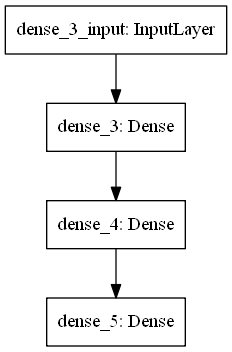

In [28]:
tf.keras.utils.plot_model(model ,to_file='model.png')

### to_categorical
-  label encoding 을 tensorflow의 One-Hot encoding 된것 으로 변경

In [24]:
tf.keras.utils.to_categorical(iris.species)

AttributeError: species

### get_file
- online 상의 데이터를 받아옴
- cache 를 이용하여 데이터 가져옴

In [34]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

32768/30286 [================================] - 0s 5us/step


'C:\\Users\\AI02\\.keras\\datasets\\auto-mpg.data'

In [36]:
dataset_path

'C:\\Users\\AI02\\.keras\\datasets\\auto-mpg.data'

### callbacks 
 - function에서의 `call` 은 함수 **호출**를 의미
 - call 상응하는 반작용 : 전화 주면 다시 전화 다시 줘요~~
 - 활용 : 학습할 때 시간이 많이 걸리기 때문에 실행내용 확인 한거 다시 보내줌.
 - `tensorboard`

In [44]:
model.compile(loss='mse', 
              optimizer=tf.keras.optimizers.Adam())

In [65]:
h=model.fit(boston.iloc[:,:-1].values, boston.target.values,
           epochs=5, batch_size=32, callbacks=[MyCallback()])

epoch 0 끝
Epoch 1/5
16/16 [==============================] - 0s 2ms/step - loss: 62.7492
epoch 1 끝
Epoch 2/5
16/16 [==============================] - 0s 1ms/step - loss: 62.7772
epoch 2 끝
Epoch 3/5
16/16 [==============================] - 0s 2ms/step - loss: 62.4843
epoch 3 끝
Epoch 4/5
16/16 [==============================] - 0s 1ms/step - loss: 62.0178
epoch 4 끝
Epoch 5/5
16/16 [==============================] - 0s 1ms/step - loss: 62.0287


In [64]:
class MyCallback(tf.keras.callbacks.Callback ):#최상위 객체 상속
    def on_epoch_begin(self, epoch, logs=None):
        print('epoch',epoch,'시작')
    def on_epoch_begin(self, epoch, logs=None):
        print('epoch',epoch,'끝')

In [58]:
dir(Mycallback) #on_... 시작하는 거 사용

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_implements_predict_batch_hooks',
 '_implements_test_batch_hooks',
 '_implements_train_batch_hooks',
 '_keras_api_names',
 '_keras_api_names_v1',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_predict_batch_begin',
 'on_predict_batch_end',
 'on_predict_begin',
 'on_predict_end',
 'on_test_batch_begin',
 'on_test_batch_end',
 'on_test_begin',
 'on_test_end',
 'on_train_batch_begin',
 'on_train_batch_end',
 'on_train_begin',
 'on_train_end',
 'set_model',
 'set_params']

In [45]:
h.history

{'loss': [66.17259979248047,
  65.7645034790039,
  65.66014862060547,
  65.61421966552734,
  65.50513458251953]}

In [48]:
type(h)

tensorflow.python.keras.callbacks.History

In [46]:
dir(h) #history?

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_chief_worker_only',
 '_implements_predict_batch_hooks',
 '_implements_test_batch_hooks',
 '_implements_train_batch_hooks',
 '_keras_api_names',
 '_keras_api_names_v1',
 '_supports_tf_logs',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_predict_batch_begin',
 'on_predict_batch_end',
 'on_predict_begin',
 'on_predict_end',
 'on_test_batch_begin',
 'on_test_batch_end',
 'on_test_begin',
 'on_test_end',
 'on_train_batch_begin',
 'on_train_batch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params',
 'validation_data']

In [40]:
h

In [67]:
tb=tf.keras.callbacks.TensorBoard() #인스턴스화

In [69]:
model.fit(boston.iloc[:,:-1].values, boston.target.values,
           epochs=5, batch_size=32, callbacks=[tb])

Epoch 1/5
 1/16 [>.............................] - ETA: 0s - loss: 48.2916WARNING:tensorflow:From C:\Users\AI02\anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
16/16 [==============================] - 0s 23ms/step - loss: 61.6598
Epoch 2/5
16/16 [==============================] - 0s 3ms/step - loss: 61.8645
Epoch 3/5
16/16 [==============================] - 0s 2ms/step - loss: 60.9184
Epoch 4/5
16/16 [==============================] - 0s 1ms/step - loss: 61.1897
Epoch 5/5
16/16 [==============================] - 0s 2ms/step - loss: 60.7863


### tensorboard

- 브라우저 창에서 학습이 어떻게 진행되었는지 시각화
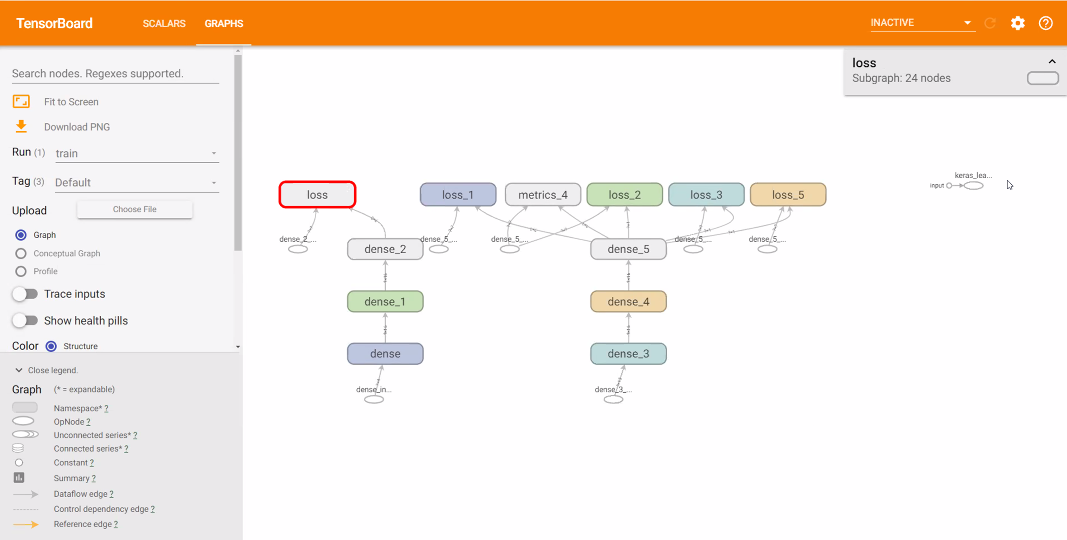
- 지정된 디렉토리에 `logs` 라는 폴더 생성됨.
- 주피터에서 텐서보드 사용할것
    - 자동 접근
    - 수동으로 port 접근 : `http://127.0.0.1:6006/`
 
 - 기존에 실행했던 모든 neural net 이 다 누적되어 나옴
     - 시작전에 log 폴더에 이전 기록 내용 지우고 시작 하면 문제 해결
 
 epoch 에 딸린 성능 변환 
 
 https://www.tensorflow.org/tensorboard?hl=ko

In [70]:
%load_ext tensorboard 

In [73]:
%tensorboard --logdir logs="C:\Users\AI02\logs" # 실행 안되면 아래것 실행

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 16340.

In [75]:
!tensorboard --logdir logs="C:\Users\AI02\logs"

^C


작업관리자에서 tensorboard.exe 끝내야 동작 정지됨


방화벽 문제: 
OSError: [WinError 10013] 액세스 권한에 의해 숨겨진 소켓에 액세스를 시도했습니다

In [74]:
!dir

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 349A-5192

 C:\Users\AI02 디렉터리

2020-08-13  오후 08:59    <DIR>          .
2020-08-13  오후 08:59    <DIR>          ..
2020-07-19  오후 05:09             1,310 .bash_history
2020-07-31  오후 09:22    <DIR>          .conda
2020-08-01  오후 02:44    <DIR>          .docker
2020-07-19  오후 12:19               197 .gitconfig
2020-08-13  오후 08:35    <DIR>          .ipynb_checkpoints
2020-07-01  오후 05:17    <DIR>          .ipython
2020-07-01  오후 09:32    <DIR>          .jupyter
2020-08-12  오후 07:02    <DIR>          .keras
2020-07-22  오후 07:23    <DIR>          .matplotlib
2020-07-19  오전 11:23                27 .minttyrc
2020-07-19  오전 11:46             1,801 .viminfo
2020-08-01  오후 12:03    <DIR>          .vscode
2020-07-31  오후 10:32         2,152,253 200731_11기_기본저녁반_필기.ipynb
2020-08-05  오후 06:48         2,104,877 200803_11기_기본저녁반_필기.ipynb
2020-08-05  오후 10:30         2,117,757 200804_11기_기본저녁반_필기.ipynb
2020-08-11  오후 07:35           341,641 200806_11기_기본저녁반_필기.ipynb

In [82]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()

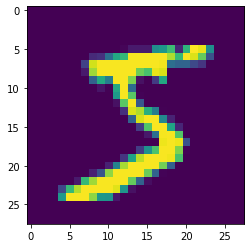

In [83]:
X_train[0]
import matplotlib.pyplot as plt
plt.imshow(X_train[0]) 

해당 이미지를 tensorboard를 통해서 보기 위해선는 다른 기법이 필요
- `create_file_writer` :텐서보드가 읽을수 있는 파일 포맷으로 변경 
- `as_default()` : tensorboard 의 기본 값 가져옴 
    - 무조건 4차원으로 크기 입력 받음

with __enter, __exit 

In [98]:
fw=tf.summary.create_file_writer('logs') #텐서보드가 읽을수 있는 파일 포맷으로 변경 
with fw.as_default():
    tf.summary.image('start image', X_train[0:25].reshape(-1,28,28,1),step=0) #[25장, 가로,세로, 채널]

mnist data 에서 25개의 데이터를 가져옴
- `tf.summary.image( 지정 이름 , data, step=None, max_outputs=3, description=None)`
 image 크기 재지정 필요 ( 이미지 갯수, 이밎 높이, 이미지 길이, 채널갯수
 
  data: A `Tensor` representing pixel data with shape `[k, h, w, c]`,
    where `k` is the number of images, `h` and `w` are the height and
    width of the images, and `c` is the number of channels, which
    should be 1, 2, 3, or 4 (grayscale, grayscale with alpha, RGB, RGBA).
    Any of the dimensions may be statically unknown (i.e., `None`).
    Floating point data will be clipped to the range [0,1).
  step: Explicit `int64`-castable monotonic step value for this summary. If
    omitted, this defaults to `tf.summary.experimental.get_step()`, which must
    not be None.
  max_outputs: Optional `int` or rank-0 integer `Tensor`. At most this
    many images will be emitted at each step. When more than
    `max_outputs` many images are provided, the first `max_outputs` many
    images will be used and the rest silently discarded.
    

In [103]:
import numpy as np  #위와 동일한 방법
with fw.as_default():
  # Don't forget to reshape.
    images = np.reshape(X_train[0:25], (-1, 28, 28, 1))
    tf.summary.image("25 training data examples", images, max_outputs=25, step=0)

%tensorboard --logdir logs/train_data

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 6400.

In [99]:
!tensorboard --logdir logs="C:\Users\AI02\logs"  

2020-08-13 21:43:47.046086: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'cudart64_101.dll'; dlerror: cudart64_101.dll not found
2020-08-13 21:43:47.046251: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.3.0 at http://localhost:6006/ (Press CTRL+C to quit)


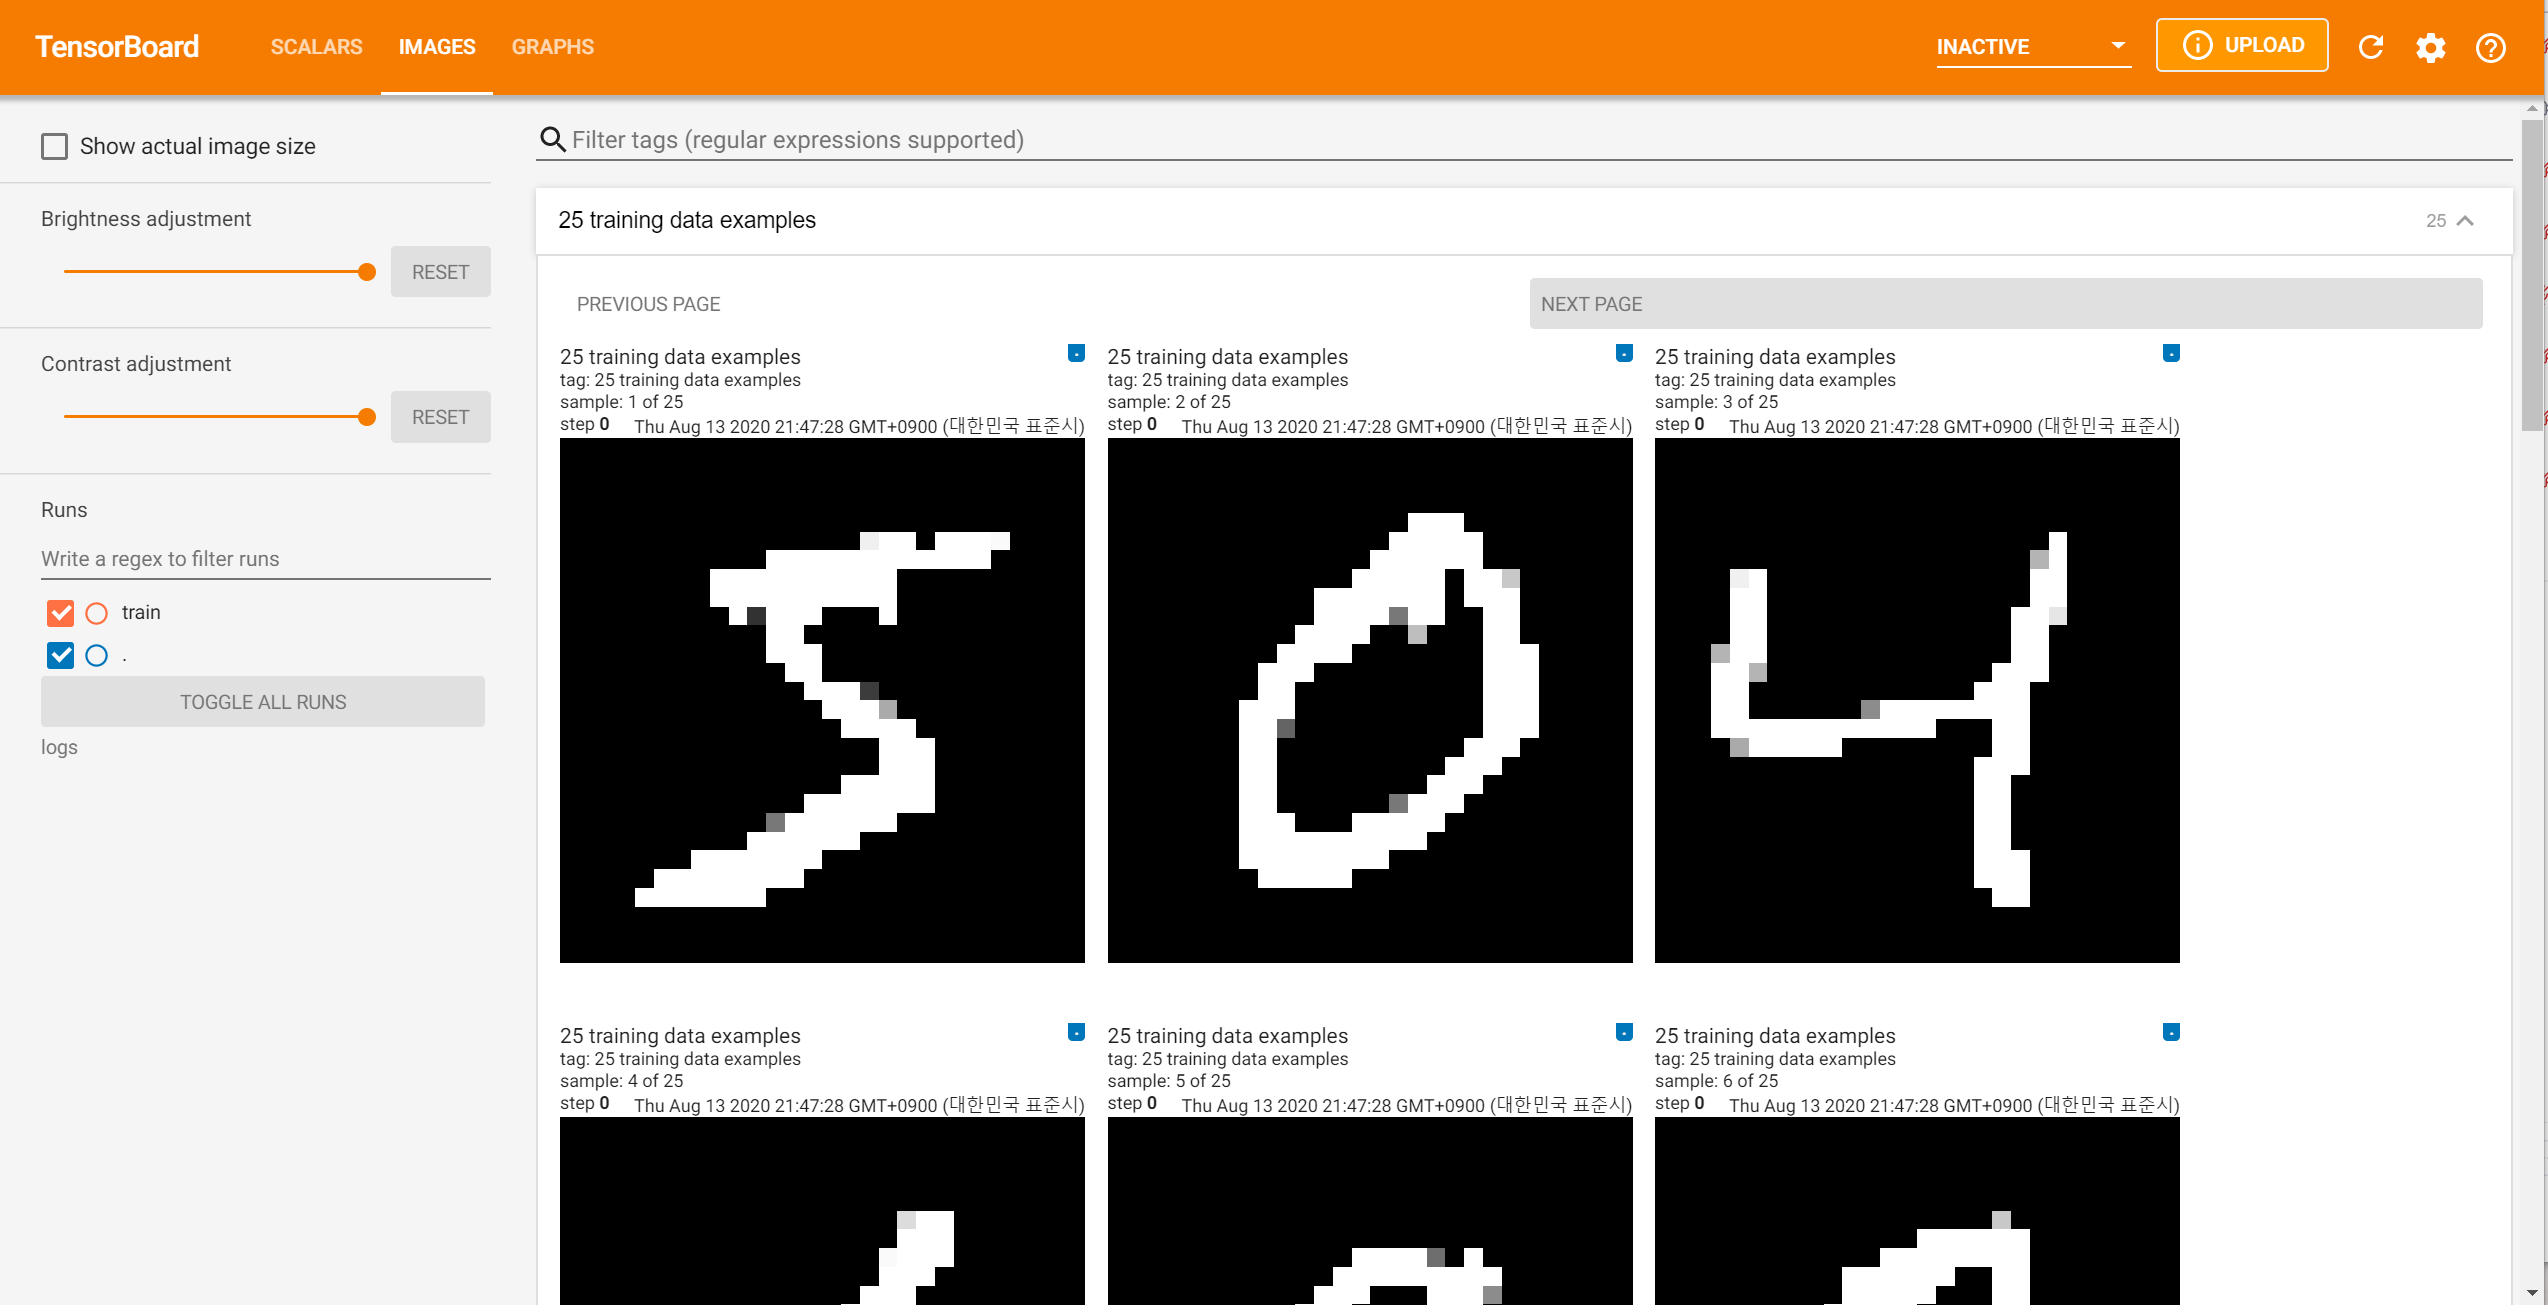
-  밝기 ,명암 변경 가능
- tf 모든 visualization 사용 가능 
    - `! `외부
    - ` % `jupyter notebook 내에서 실행
    
    
> - Mac, Ubuntu 사용편리하나 Mac 은 GPU 지원안함
    - 운영체제 마다 다름.

### callback 활용
- 사용할수 있는 technique 가 많음
- customizing
    - 오버라이딩 통해서 event 시작, 끝 시점에 기능 추가(고유 기능 변경 불가)

       - CSVLogger : csv 파일 어덯게 학습되는지 기록 - pandas 로 쉽게 
       - labmda 이용
       - earlystopping : overfiting 
       - history : 아무것도 하지 않아도 callback 지정하지않으면 history
       - tensorboard...

- batch
    - 한 번에 모든 데이터를 다 사용할것인가?
    - batch 사이즈 만큼 받아서 weight update
       - 크면 업데이트 자주 안해서 속도 빠름
           - 미묘한 조절 힘듦
       - 작으면 업데이트 자주 있어서 속도 느림

- epoch
    - 전체 데이터를 한번 학습시킨 횟수
 
   

In [ ]:
tf.keras.callbacks.Callback.on_batch_

In [ ]:
#오버라이딩통해 기능 상속해서 추가
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('') #100번쨰에 공백
    print('.', end='')

EPOCHS = 1000
# epoch 끝날떄마사 callback 실행됨.
history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])

### callback technique : History

In [109]:
model.compile(loss='mse', 
              optimizer=tf.keras.optimizers.Adam(), metrics='mae')

In [114]:
h=model.fit(boston.iloc[:,:-1].values, boston.target.values,
           epochs=15, validation_split=0.3,batch_size=1)

Epoch 1/15
354/354 [==============================] - 1s 3ms/step - loss: 57.2797 - mae: 5.4268 - val_loss: 136.1489 - val_mae: 10.0480
Epoch 2/15
354/354 [==============================] - 1s 2ms/step - loss: 55.7956 - mae: 5.4471 - val_loss: 155.6309 - val_mae: 11.0009
Epoch 3/15
354/354 [==============================] - 1s 3ms/step - loss: 51.2809 - mae: 5.1477 - val_loss: 208.4739 - val_mae: 13.1444
Epoch 4/15
354/354 [==============================] - 1s 2ms/step - loss: 51.1369 - mae: 5.2703 - val_loss: 118.0705 - val_mae: 9.2442
Epoch 5/15
354/354 [==============================] - 1s 3ms/step - loss: 47.8923 - mae: 4.9903 - val_loss: 153.1417 - val_mae: 10.8420
Epoch 6/15
354/354 [==============================] - 1s 3ms/step - loss: 47.2330 - mae: 4.9441 - val_loss: 137.6972 - val_mae: 10.2399
Epoch 7/15
354/354 [==============================] - 1s 3ms/step - loss: 44.2826 - mae: 4.7992 - val_loss: 148.2240 - val_mae: 10.7150
Epoch 8/15
354/354 [=============================

 validation_split 
    - 데이터를 30%를 검정용으로 사용하여 분리해서 보여줌

In [115]:
h.history

{'loss': [57.27970886230469,
  55.79560089111328,
  51.280914306640625,
  51.13685607910156,
  47.892333984375,
  47.23298645019531,
  44.28261184692383,
  40.79450988769531,
  38.71921157836914,
  36.7106819152832,
  33.49687194824219,
  33.19303512573242,
  31.786029815673828,
  29.70599937438965,
  28.627689361572266],
 'mae': [5.426751136779785,
  5.447129249572754,
  5.147700309753418,
  5.270336627960205,
  4.990344524383545,
  4.9441237449646,
  4.799228668212891,
  4.60340690612793,
  4.576803684234619,
  4.389423370361328,
  4.167056083679199,
  4.178022861480713,
  4.0521321296691895,
  3.9766862392425537,
  4.008671283721924],
 'val_loss': [136.14889526367188,
  155.63088989257812,
  208.47390747070312,
  118.07051849365234,
  153.14166259765625,
  137.69723510742188,
  148.2240447998047,
  205.32513427734375,
  217.1964874267578,
  183.1713104248047,
  149.0348663330078,
  138.57009887695312,
  168.38876342773438,
  146.40762329101562,
  215.9889678955078],
 'val_mae': [10.

overfiting 임을 알수 있음
validation 데이터의 에러값은 

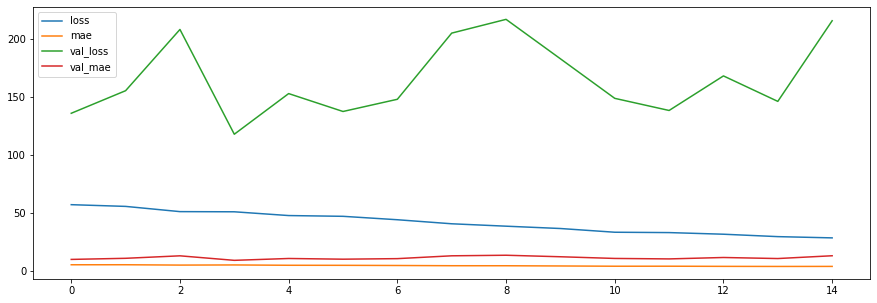

In [117]:
pd.DataFrame(h.history).plot.line(figsize=(15,5))

In [64]:
class MyCallback(tf.keras.callbacks.Callback ):#최상위 객체 상속
    def on_epoch_begin(self, epoch, logs=None):
        print('epoch',epoch,'시작')
    def on_epoch_begin(self, epoch, logs=None):
        print('epoch',epoch,'끝')

In [67]:
tb=tf.keras.callbacks.TensorBoard() #인스턴스화

머신러닝 가장 기본 분류, 회귀는 

activation function 
역할 
- 데이터를 비선형으로 공간 왜곡 threshold 를 기준으로 나눔
- 복잡한것을 단순화 하는 특정 공간을 찾음
: linear 사용해도 되지만 성능 향상 없음, relu : sigmoind, tanh에서 graident vanishing  값이 커지면 편미분한 값이 0으로 되는것을 방지
        레이어 많을때 relu 사용
    Tensorflwo Palyground : https://playground.tensorflow.org/

        뉴런, 레이어가 많아질수록 복잡해지고 빨리 배움
        
머신 러닝 단기 집중 과정: https://developers.google.com/machine-learning/crash-course/ml-intro?hl=ko

underfiting, overfiting 다룰 예정